In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys 
sys.path.insert(0, '../src/')

from astropy.table import Table
import galhalo
import os
import warnings; warnings.simplefilter('ignore')


>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...
>>> Building interpolation grid for Green+19 M(<r|f_b,c)...
>>> Building interpolation grid for Green+19 sigma(r|f_b,c)...
>>> Building interpolation grid for Green+19 d2Phidr2(r|f_b,c)...
>>> Building interpolator for Jiang+15 orbit sampler...


$\log_{10} (M_{*}) = \log_{10} (\epsilon M_{1})+ \alpha \log_{10} (M_{peak}) - \alpha \log_{10}(M_1)$

$ M_{*} = \epsilon M_{1} \left( \frac{M_{peak}}{M_1} \right)^{\alpha}$

$ M_{*} = \left( \epsilon M_{1}^{1-\alpha} \right) \left( M_{peak} \right)^{\alpha} $

$\log_{10} (M_{*}) = \alpha \log_{10} (M_{peak}) + \log_{10}\left( \epsilon M_{1}^{1-\alpha} \right)$

$y = mx + b$, where $a$ is the slope, and $b$ the intercept, is a function of the slope and the normalization 



------------------------------




$\sigma(M_{peak}) = \sigma_0 + \gamma \left( \log_{10} (M_{peak}) − \log_{10}( M_1 ) \right)$ for the increasing scatter!

In [2]:
def dex(value):
    
    #10^(0.1) = 0.1 dex
    
    return 10**(value)

def lgMs_D22_dex(lgMv, dex):
    """    
    returns the stellar mass [M_sun] plus a random sample of a lognormal distribution defined by dex
    """
    
    log_e = -1.5
    a = 1.82
    Ms = 10**(log_e + 12.5 + a*lgMv - a*12.5) # not in log space so I can properly sample
    
    return np.log10([np.random.lognormal(sigma=dex)*i for i in Ms]) 
    # the loop is so that the input mass can also be an array"

In [3]:
halo_masses = np.log10(np.logspace(8, 13, 100)) # just for the model

stellar_masses = galhalo.lgMs_D22_det(halo_masses) 

stellar_masses_15 = lgMs_D22_dex(halo_masses, 0.01) 

stellar_masses_5 = lgMs_D22_dex(halo_masses, 0.15) 

stellar_masses_2 = lgMs_D22_dex(halo_masses, 0.30) 

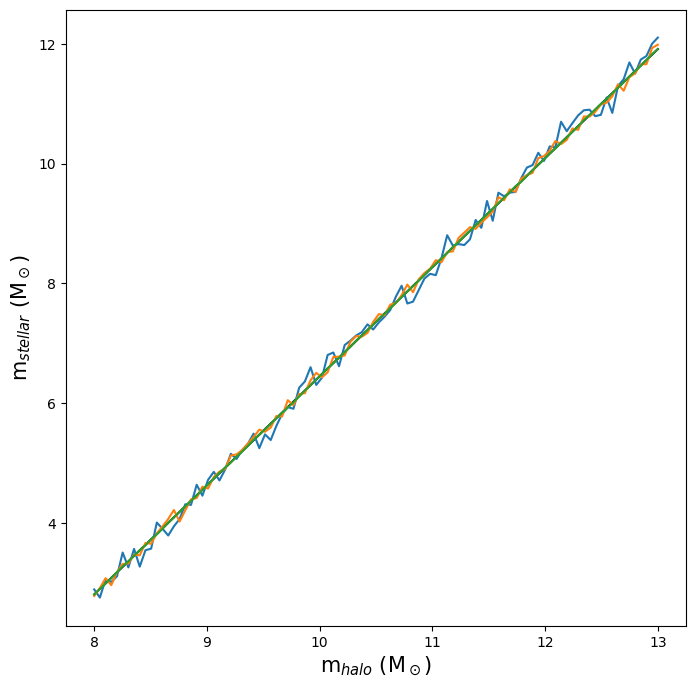

In [4]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses, color="black", label="deterministic")

plt.plot(halo_masses, stellar_masses_2, label="0.3 dex scatter")
plt.plot(halo_masses, stellar_masses_5, label="0.15 dex scatter")
plt.plot(halo_masses, stellar_masses_15, label="0.01 dex scatter")


plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
#plt.legend()
#plt.savefig("../figures/SHMR_scatter.png")
plt.show()

In [11]:
def new_SHMR(lgMv, a=1.82, log_e=-1.5, norm=12.5):
    """
    returns the determinisitic stellar mass [M_sun]
    """
    lgMs = log_e + norm + a*lgMv - a*norm

    return lgMs

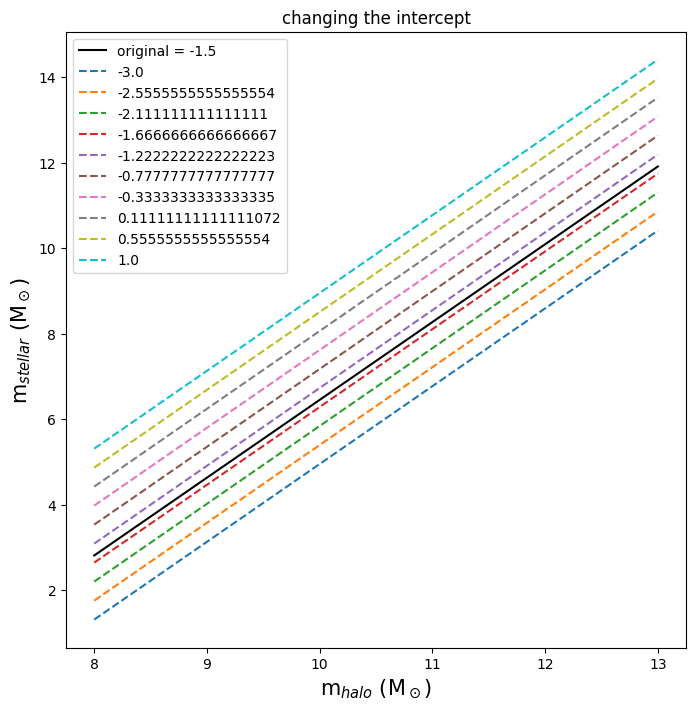

In [12]:
b_vals = np.linspace(-3, 1, 10)

plt.figure(figsize=(8, 8))

plt.title("changing the intercept")
plt.plot(halo_masses, stellar_masses, label="original = -1.5", color="black")
for i in b_vals:
    plt.plot(halo_masses, new_SHMR(halo_masses, log_e=i), ls="--", label=str(i))
plt.legend()
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.show()


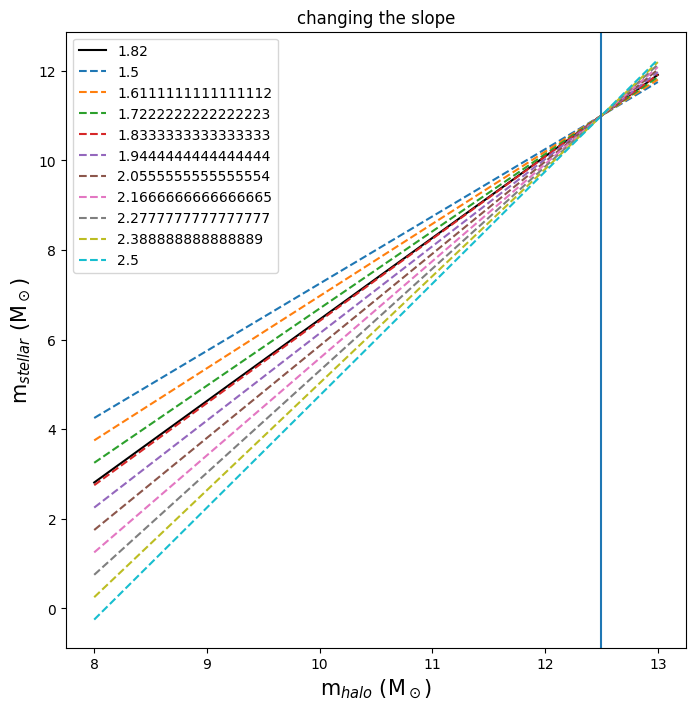

In [15]:
a_vals = np.linspace(1.5,2.5,10)

plt.figure(figsize=(8, 8))

plt.title("changing the slope")
plt.plot(halo_masses, stellar_masses, label="1.82", color="black")
for i in a_vals:
    plt.plot(halo_masses, new_SHMR(halo_masses, i, -1.5), ls="--", label=str(i))
plt.legend()
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.axvline(12.5)
plt.show()

In [16]:
def new_SHMR_red_s(lgMv, gamma, red):

    red_dep = (1+red)/(1+np.average(red))
    a = 1.82*red_dep**gamma
    log_e = -1.5
    lgMs = log_e + 12.5 + a*lgMv - a*12.5

    return lgMs

In [19]:
redshifts = np.random.lognormal(sigma=0.5, size = halo_masses.shape[0])

gamma_vals = np.linspace(-.5,.5,10)


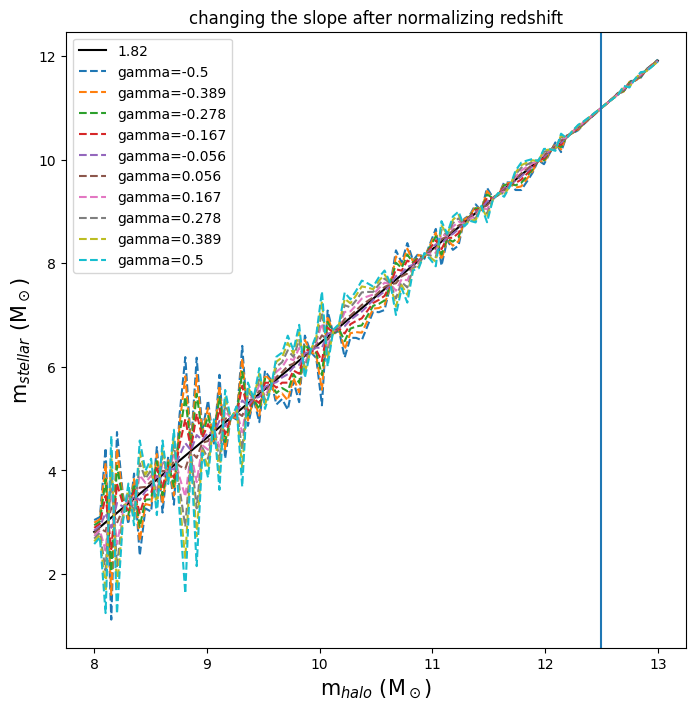

In [22]:

plt.figure(figsize=(8, 8))

plt.title("changing the slope after normalizing redshift")
plt.plot(halo_masses, stellar_masses, label="1.82", color="black")
for i in gamma_vals:
    plt.plot(halo_masses, new_SHMR_red_s(halo_masses, i, redshifts), ls="--", label="gamma="+str(np.round(i,3)))
plt.legend()
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.axvline(12.5)
plt.show()


In [8]:
stellar_masses_RP = galhalo.lgMs_RP17(halo_masses, 0)
stellar_masses_B = galhalo.lgMs_B13(halo_masses,0)

stellar_masses_RP_1 = galhalo.lgMs_RP17(halo_masses, 0.5)
stellar_masses_B_1 = galhalo.lgMs_B13(halo_masses,0.5)

stellar_masses_RP_2 = galhalo.lgMs_RP17(halo_masses, 1)
stellar_masses_B_2 = galhalo.lgMs_B13(halo_masses,1)

stellar_masses_RP_3 = galhalo.lgMs_RP17(halo_masses, 1.5)
stellar_masses_B_3 = galhalo.lgMs_B13(halo_masses,1.5)

stellar_masses_RP_4 = galhalo.lgMs_RP17(halo_masses, 2)
stellar_masses_B_4 = galhalo.lgMs_B13(halo_masses,2)

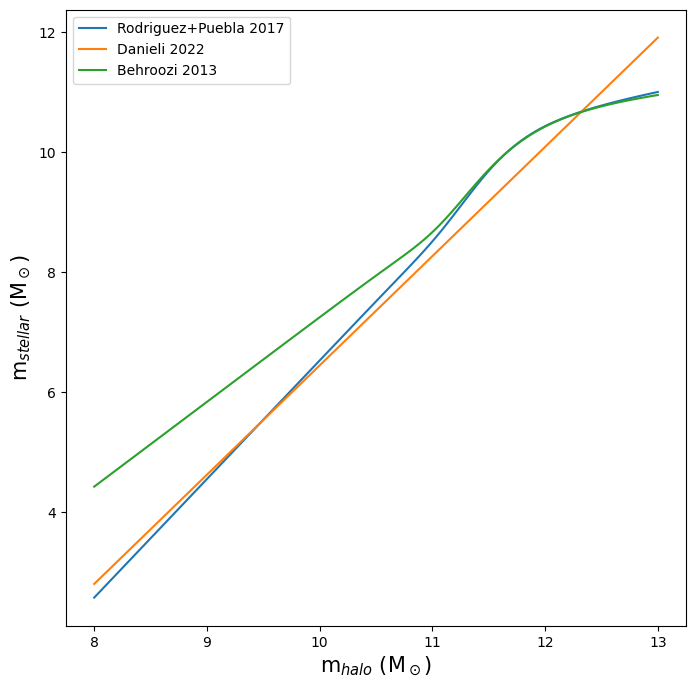

In [9]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_RP, label="Rodriguez+Puebla 2017")
plt.plot(halo_masses, stellar_masses, label="Danieli 2022")
plt.plot(halo_masses, stellar_masses_B, label="Behroozi 2013")

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()

plt.show()

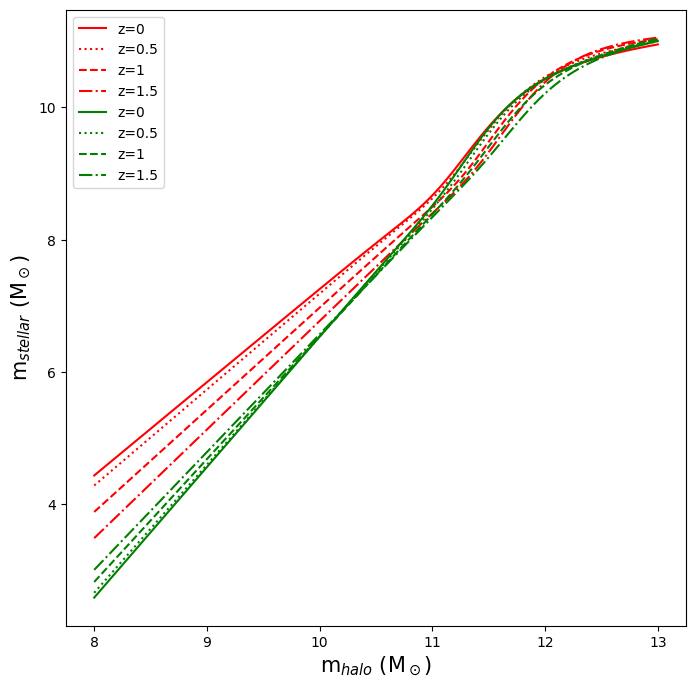

In [10]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_B, label="z=0", color="red")
plt.plot(halo_masses, stellar_masses_B_1, label="z=0.5", color="red", ls=":")
plt.plot(halo_masses, stellar_masses_B_2, label="z=1", color="red", ls="--")
plt.plot(halo_masses, stellar_masses_B_3, label="z=1.5", color="red", ls="-.")

plt.plot(halo_masses, stellar_masses_RP, label="z=0", color="green")
plt.plot(halo_masses, stellar_masses_RP_1, label="z=0.5", color="green", ls=":")
plt.plot(halo_masses, stellar_masses_RP_2, label="z=1", color="green", ls="--")
plt.plot(halo_masses, stellar_masses_RP_3, label="z=1.5", color="green", ls="-.")

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()

plt.show()